In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score, auc
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from sklearn.base import TransformerMixin
import string
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
df = pd.read_csv("job_train.csv")

In [ ]:
df.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [ ]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,8940.000000,8940.000000,8940.000000,8940.000000
mean,0.043736,0.794407,0.487248,0.051007
std,0.204519,0.404157,0.499865,0.220024
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8940 non-null   object
 1   location          8783 non-null   object
 2   description       8939 non-null   object
 3   requirements      7614 non-null   object
 4   telecommuting     8940 non-null   int64 
 5   has_company_logo  8940 non-null   int64 
 6   has_questions     8940 non-null   int64 
 7   fraudulent        8940 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 558.9+ KB


In [ ]:
df.isna().sum()

,0
title,0
location,157
description,1
requirements,1326
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [ ]:
df.shape

(8940, 8)

# Handling missing values

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

,0
title,0
location,0
description,0
requirements,0
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


# Exploratory data analysis

To understand the dataset properly, we perform exploratory data analysis

## Distribution of job characteristics

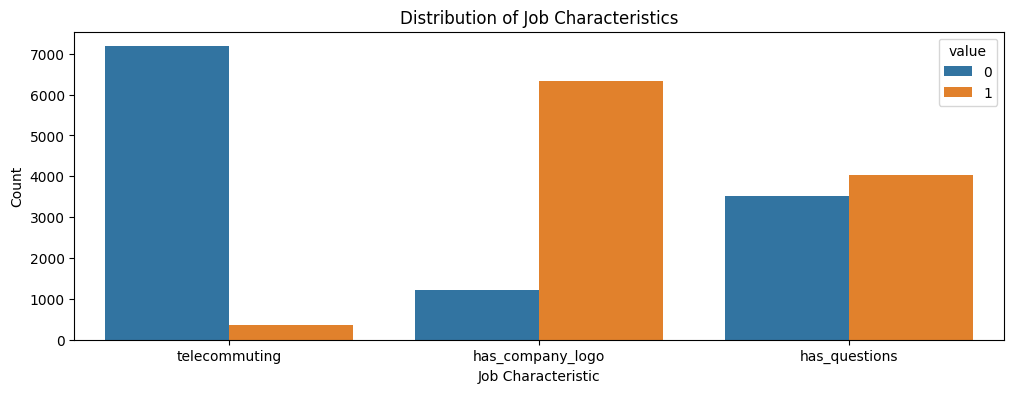

In [ ]:
# Visualize the distribution of telecommuting, company logo, and fraudulent jobs
plt.figure(figsize=(12, 4))
sns.countplot(data=df.melt(value_vars=['telecommuting', 'has_company_logo', 'has_questions']),
              x='variable', hue='value')
plt.title('Distribution of Job Characteristics')
plt.xlabel('Job Characteristic')
plt.ylabel('Count')
plt.show()

## Word cloud of job titles

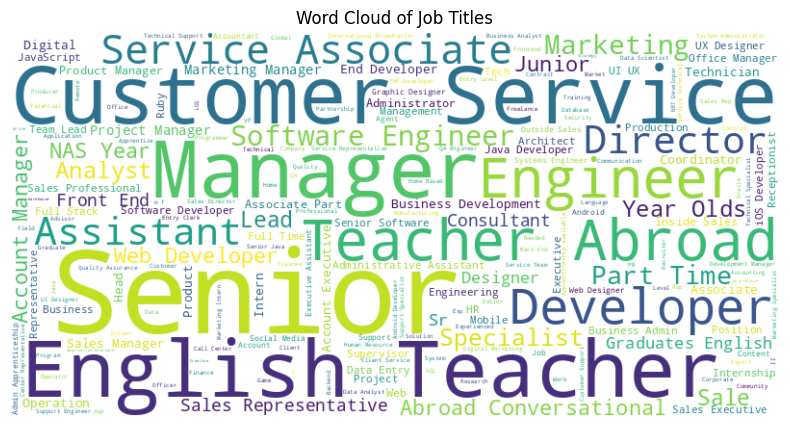

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()

## Word cloud of Job requirements

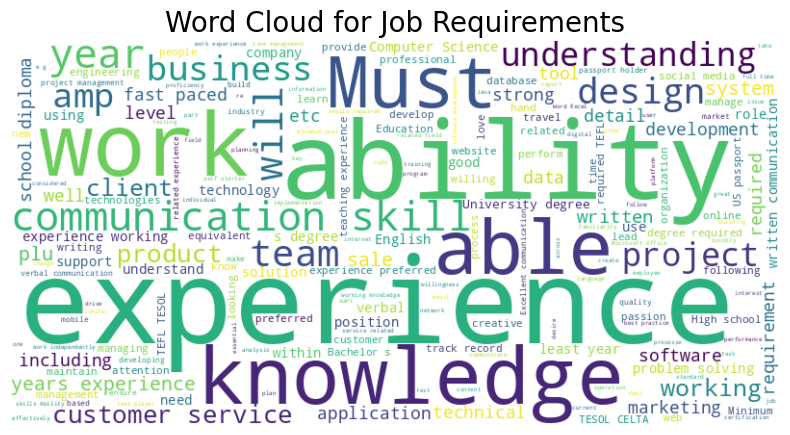

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text in the 'requirements' column
text = " ".join(requirement for requirement in df['requirements'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Requirements', fontsize=20)
plt.show()

## Distribution of Job locations

In [ ]:
# Extract the first part of the location
df['first_part'] = df['location'].str.split(',').str[0].str.strip()

# Count occurrences of each first part
location_counts = df['first_part'].value_counts()

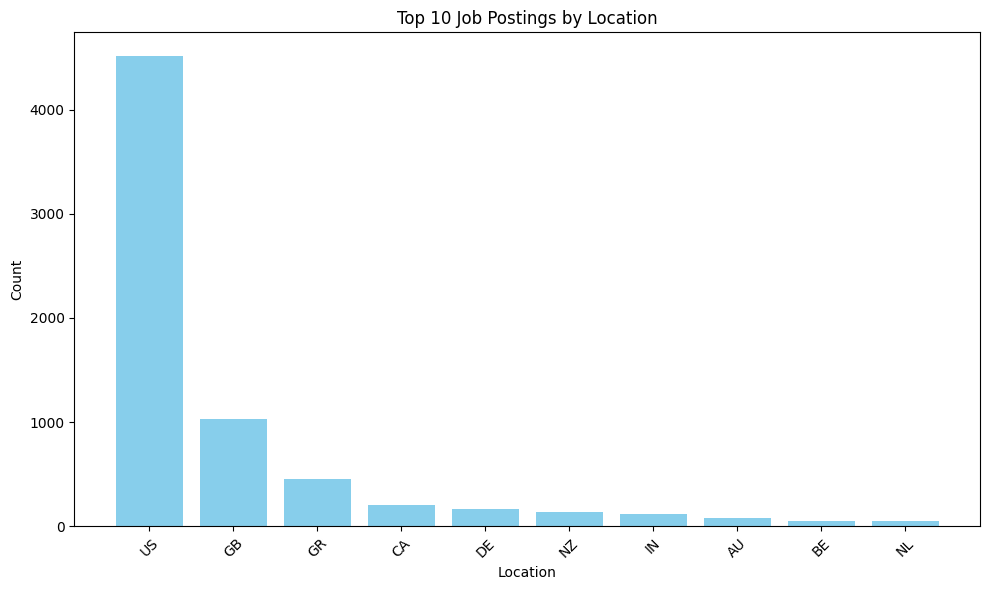

In [ ]:
# Get the top 10 locations
top_10_locations = location_counts.head(10)

# Create a bar plot for the top 10 locations
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations.index, top_10_locations.values, color='skyblue')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Job Postings by Location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

## Fraudulent and Non-Fraudulent postings

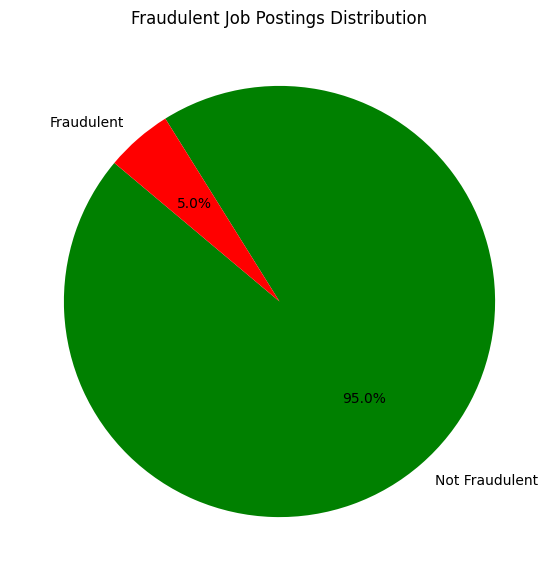

In [ ]:
fraud_counts = df['fraudulent'].value_counts()

# Plot the pie chart
labels = ['Not Fraudulent', 'Fraudulent']
colors = ['green', 'red']

plt.figure(figsize=(7, 7))
plt.pie(fraud_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fraudulent Job Postings Distribution')
plt.show()

## Data Preprocessing

We apply preprocessing techniques on the dataset to perform cleaning and handling missing values

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df["text"] = df["description"]+df["requirements"]

In [ ]:
def clean_text(text):

    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
df['text']=df['text'].apply(clean_text)

## Data Normalisation

In [ ]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

In [ ]:
df['text']=df['text'].apply(normalize_text)

In [ ]:
df["text"]=df["text"].str.lower()

In [ ]:
# Create a translation table with all punctuation
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
df["text"] = df["text"].str.translate(translator)

In [ ]:
del df["requirements"]
del df["description"]
del df["first_part"]

## Model training

We use XGBoost classifier to train the model

In [ ]:
df.head()

,title,location,telecommuting,has_company_logo,has_questions,fraudulent,text
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,",0,1,0,0,behalf client well know multinational retail c...
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi",0,1,0,0,argenta field solution rapidly expand award wi...
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",0,0,0,0,experience process control staff engineer requ...
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",0,1,0,0,passion people love sell telephone role overvi...
4,Senior Network Engineer,"GB, ENG, London",0,1,0,0,successful senior network engineer must jncia ...


In [ ]:
  # Feature extraction using TF-IDF
  tfidf = TfidfVectorizer(max_features=5000)
  X = tfidf.fit_transform(df['text']).toarray()
  y = df['fraudulent']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

## Hyperparamter tuning

We perform hyperparameter tuning using GridSearchCV to enhance the results

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1],
    'reg_alpha': [0],
    'reg_lambda': [1],
}

In [ ]:
# Initialize GridSearchCV with the XGBoost classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=1, verbose=2, scoring='roc_auc')

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:05:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:05:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:05:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:05:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:05:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:06:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:06:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  20.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:06:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:07:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  19.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:07:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:08:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:08:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:08:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:08:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:08:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  26.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:09:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  26.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:09:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  25.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:10:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  26.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:10:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  24.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:11:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:11:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:11:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:11:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:12:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:12:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:12:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  22.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:13:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:13:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  21.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  17.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:14:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  29.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:15:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  28.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:16:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  28.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:16:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  28.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:17:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  27.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:17:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:17:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:18:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  20.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:18:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:19:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:19:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  21.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:21:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:21:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:21:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  24.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:21:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  25.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:22:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  25.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:22:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  26.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:23:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:23:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:23:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:24:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:24:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:24:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:25:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  23.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:25:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  22.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:26:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:26:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  16.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:27:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  29.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:28:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  28.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:28:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  28.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:29:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  27.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:29:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=  27.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:30:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'reg_alpha': [0],
                         'reg_lambda': [1], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [ ]:
# Get the best parameters and evaluate
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

## Evaluation metrics

In [ ]:
# Evaluate the model with the best parameters
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1414
           1       1.00      0.52      0.68        93

    accuracy                           0.97      1507
   macro avg       0.98      0.76      0.83      1507
weighted avg       0.97      0.97      0.97      1507



In [ ]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.9701393497013935


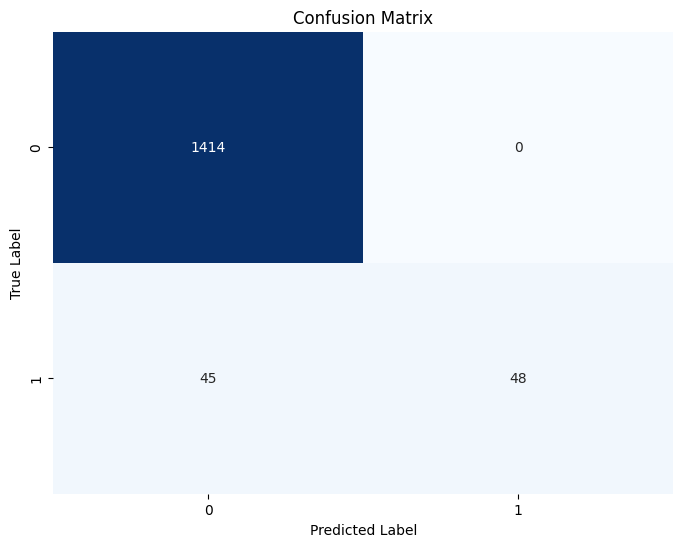

In [ ]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

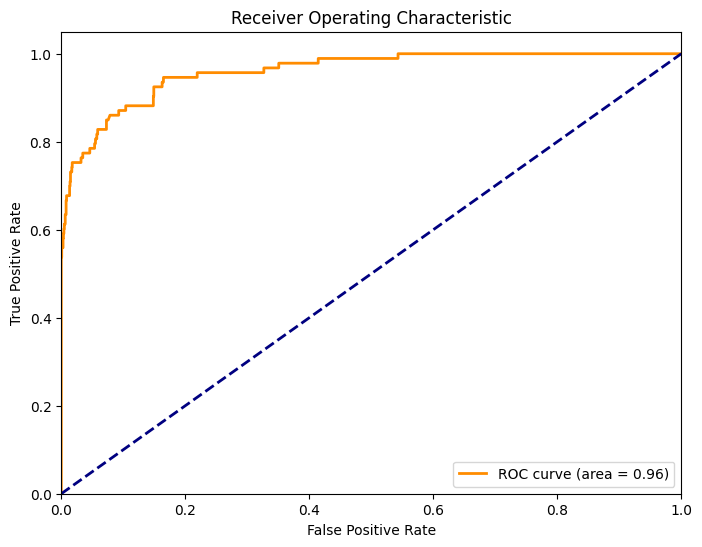

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()